In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
frames = [df_train, df_test]
df_total = pd.concat(frames)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


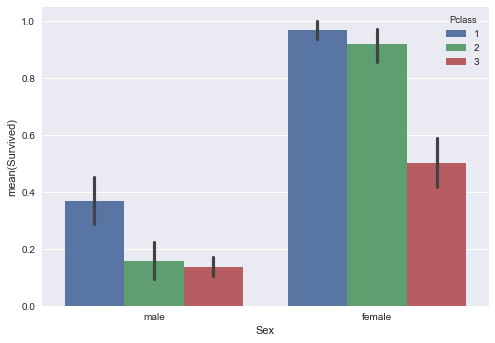

In [6]:
count_f = df_train[df_train["Sex"] == "female"].sum()
count_m = df_train[df_train["Sex"] == "male"].sum()

ax = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)

In [7]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
df_train.corrwith(df_train[["Survived", "PassengerId"]])

Age            NaN
Fare           NaN
Parch          NaN
PassengerId    1.0
Pclass         NaN
SibSp          NaN
Survived       1.0
dtype: float64

In [9]:
df_total = df_total.dropna(axis=0, how="any")

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_total[['Pclass', 'Age', 'Sex', 'SibSp']], df_total['Survived'])

In [11]:
d = {'female': 0, 'male': 1}
x_train['Sex'] = x_train['Sex'].map(d)
x_test['Sex'] = x_test['Sex'].map(d)

In [12]:
x_train = x_train.as_matrix()


In [13]:
print(x_train)

[[  1.   56.    1.    0. ]
 [  1.   42.    1.    1. ]
 [  1.   21.    0.    2. ]
 [  1.   53.    0.    2. ]
 [  1.   30.    0.    0. ]
 [  1.   22.    0.    1. ]
 [  1.   25.    1.    1. ]
 [  1.   45.    1.    1. ]
 [  1.   24.    0.    0. ]
 [  1.   18.    1.    1. ]
 [  2.   23.    0.    0. ]
 [  1.   28.    1.    0. ]
 [  1.   18.    0.    2. ]
 [  2.   36.    0.    0. ]
 [  2.    2.    1.    1. ]
 [  1.   64.    1.    1. ]
 [  3.    2.    0.    0. ]
 [  1.   24.    0.    0. ]
 [  1.   58.    0.    0. ]
 [  1.   29.    1.    1. ]
 [  1.   47.    0.    1. ]
 [  2.   29.    0.    0. ]
 [  3.   42.    1.    0. ]
 [  1.   27.    1.    1. ]
 [  1.   44.    0.    0. ]
 [  1.   50.    0.    0. ]
 [  1.   31.    1.    1. ]
 [  1.   44.    0.    0. ]
 [  2.   34.    0.    0. ]
 [  1.   35.    1.    0. ]
 [  1.   36.    1.    0. ]
 [  1.   56.    1.    0. ]
 [  1.   22.    0.    0. ]
 [  1.   25.    0.    1. ]
 [  1.   17.    0.    1. ]
 [  1.   21.    0.    0. ]
 [  1.   41.    0.    0. ]
 

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [19]:
print(neigh.predict(x_test))
print(y_test)

[ 1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.]
268    1.0
591    1.0
319    1.0
329    1.0
789    0.0
630    1.0
679    1.0
585    1.0
781    1.0
394    1.0
462    0.0
310    1.0
305    1.0
370    1.0
453    1.0
698    0.0
887    1.0
136    1.0
765    1.0
689    1.0
802    1.0
872    0.0
618    1.0
809    1.0
741    0.0
879    1.0
10     1.0
262    0.0
681    1.0
544    0.0
445    1.0
583    0.0
54     0.0
299    1.0
345    1.0
318    1.0
412    1.0
486    1.0
496    1.0
540    1.0
452    0.0
577    1.0
332    0.0
504    1.0
275    1.0
763    1.0
Name: Survived, dtype: float64
